In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import numpy as np
import seaborn as sns
import scipy as sc

In [2]:
warnings.filterwarnings("ignore")
df = pd.read_csv(r"books.csv",sep=",", error_bad_lines=False, index_col="bookID")
df.columns = df.columns.str.replace(" ", "")
df = df[df.ratings_count != 0]
df = df[df['num_pages'].apply(lambda x: isinstance(x, (int, float)))]

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [4]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df["is_eng"] = df["language_code"].str.contains('eng|en-').astype(int)
df.drop(columns=["language_code"]);

In [6]:
df["publication_date"] = pd.to_datetime(df["publication_date"], errors='coerce')
df = df.dropna()
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,is_eng
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,1
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,1
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,1
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,1
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,1


In [7]:
if df['num_pages'].dtype == 'float64':
    print("all good with num_pages")
else:
    print("some values in num_pages are not floats")

some values in num_pages are not floats


In [8]:
specific_date_str = "2020-01-01"
specific_date = pd.to_datetime(specific_date_str)

df["time_since_published"] = df["publication_date"].apply(lambda x: (specific_date - x).days)
df["log_time_since_published"] = np.log(df["time_since_published"])

In [9]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,is_eng,time_since_published,log_time_since_published
count,11041.000000,1.104100e+04,11041.000000,1.104100e+04,11041.000000,11041.000000,11041.000000,11040.000000
mean,3.943213,9.759719e+12,336.703741,1.807515e+04,546.046735,0.948555,7058.049543,8.795880
std,0.295221,4.446139e+11,240.978566,1.129056e+05,2585.749958,0.220913,3001.854683,0.352289
min,1.000000,8.987060e+09,0.000000,1.000000e+00,0.000000,0.000000,-90.000000,4.919981
25%,3.780000,9.780345e+12,194.000000,1.100000e+02,9.000000,1.000000,5205.000000,8.557375
50%,3.960000,9.780573e+12,300.000000,7.660000e+02,48.000000,1.000000,6150.000000,8.724207
75%,4.140000,9.780872e+12,416.000000,5.061000e+03,241.000000,1.000000,7823.000000,8.964823
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,1.000000,43829.000000,10.688051


In [10]:
df.head()
print(df.columns)
def is_audio(row):
    if row['num_pages'] < 30 or "audio" in row["publisher"]:
        return 1
    else:
        return 0

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'is_eng', 'time_since_published',
       'log_time_since_published'],
      dtype='object')


In [11]:
df["r_count_per_yr"] = df.ratings_count / df.time_since_published
df["t_count_per_yr"] = df.text_reviews_count / df.time_since_published
df["audio"] = df.apply(lambda row: is_audio(row), axis=1)

In [12]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,is_eng,time_since_published,log_time_since_published,r_count_per_yr,t_count_per_yr,audio
bookID,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,1,4855,8.487764,431.656025,5.683007,0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,1,5600,8.630522,384.494107,5.218036,0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,1,5905,8.683555,1.072481,0.041321,0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,1,5723,8.652248,408.803949,6.347196,0
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,1,5588,8.628377,7.413744,0.029349,0


In [13]:
df = df[df.audio == 0]

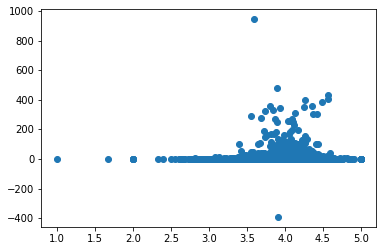

In [14]:
plt.scatter( df.average_rating, df.r_count_per_yr)

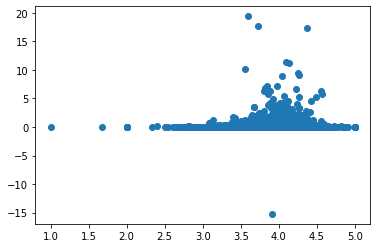

In [15]:
plt.scatter( df.average_rating, df.t_count_per_yr)

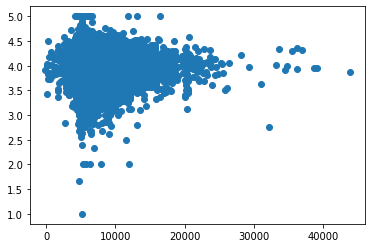

In [16]:
plt.scatter(df.time_since_published, df.average_rating)

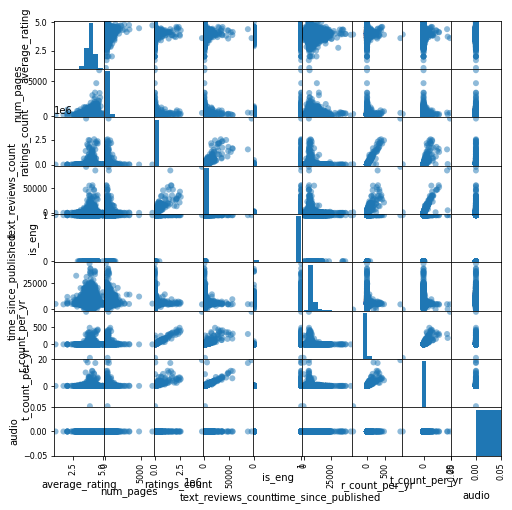

In [17]:
cols = ["average_rating", "num_pages", "ratings_count", "text_reviews_count", "is_eng", "time_since_published", "r_count_per_yr", "t_count_per_yr", "audio"]
pd.plotting.scatter_matrix(df[cols], figsize=(8,8), marker="o")
plt.show()

In [18]:
print(df.columns)

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'is_eng', 'time_since_published',
       'log_time_since_published', 'r_count_per_yr', 't_count_per_yr',
       'audio'],
      dtype='object')


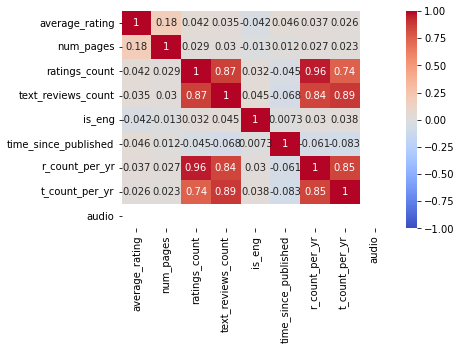

In [19]:
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [20]:
df[cols].head()

,average_rating,num_pages,ratings_count,text_reviews_count,is_eng,time_since_published,r_count_per_yr,t_count_per_yr,audio
bookID,,,,,,,,,
1,4.57,652,2095690,27591,1,4855,431.656025,5.683007,0
2,4.49,870,2153167,29221,1,5600,384.494107,5.218036,0
4,4.42,352,6333,244,1,5905,1.072481,0.041321,0
5,4.56,435,2339585,36325,1,5723,408.803949,6.347196,0
8,4.78,2690,41428,164,1,5588,7.413744,0.029349,0


LinAlgError: ignored

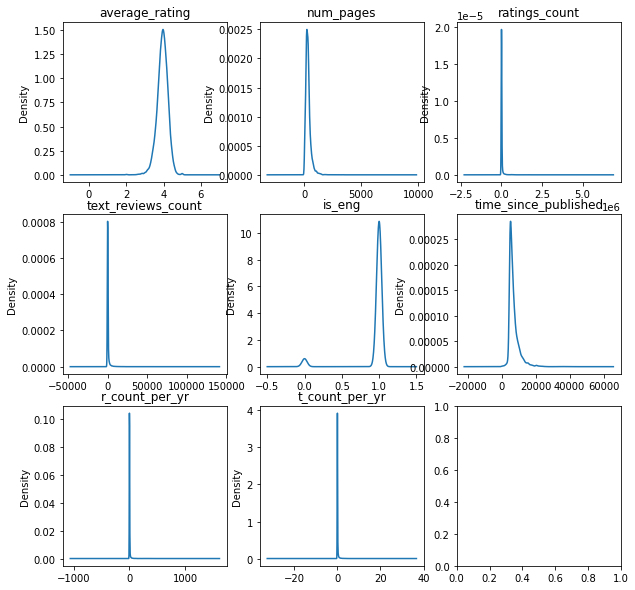

In [35]:
df_num = df[cols]
fix, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, column in enumerate(df_num.columns):
    row = i // 3
    col = i % 3
    df_num[column].plot(kind="density", ax=axes[row][col], title=column)
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0f7150820>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0f7318940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0f7150bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0f7318c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0f8bc6a90>],
 'means': []}

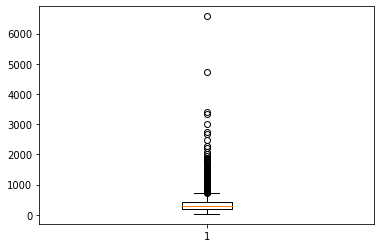

In [36]:
plt.boxplot(df['num_pages'])

In [37]:
q1 = df['num_pages'].quantile(0.25)
q3 = df['num_pages'].quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

In [38]:
df_filtered_iqr = df[(df['num_pages'] >= lower_bound) & (df['num_pages'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0f9505f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0f9505700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0f95055b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0f8c923d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0f8c92eb0>],
 'means': []}

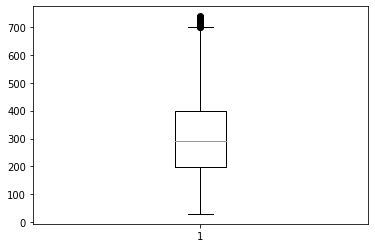

In [39]:
plt.boxplot(df_filtered_iqr['num_pages'])

In [40]:
p5 = df['num_pages'].quantile(0.05)
p95 = df['num_pages'].quantile(0.95)

df_filtered_90 = df[(df['num_pages'] >= p5) & (df['num_pages'] <= p95)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0f984ef40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0fc29f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0f984e940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0fc29f400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0fc29f8e0>],
 'means': []}

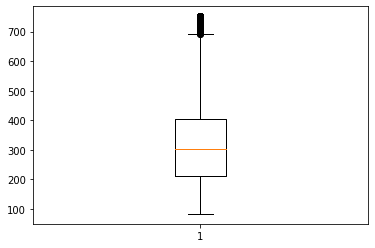

In [41]:
plt.boxplot(df_filtered_90['num_pages'])

<AxesSubplot:title={'center':'num_pages'}, ylabel='Density'>

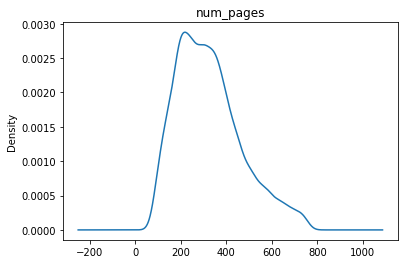

In [42]:
df_filtered_90['num_pages'].plot(kind='density', title="num_pages")

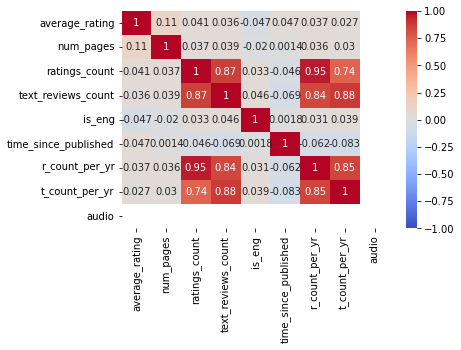

In [43]:
corr = df_filtered_90[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

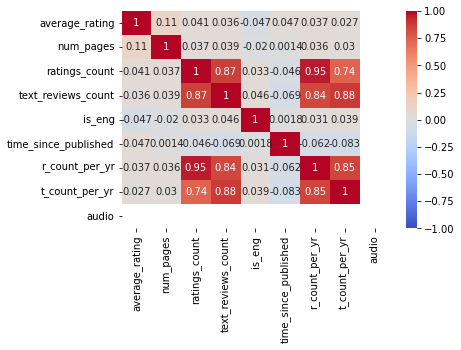

In [45]:
corr = df_filtered_90[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

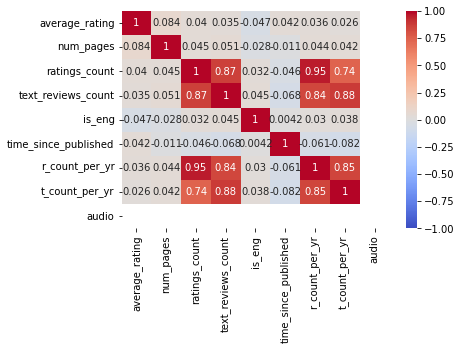

In [46]:
corr = df_filtered_iqr[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [47]:
p025 = df['num_pages'].quantile(0.025)
p975 = df['num_pages'].quantile(0.975)

df_filtered_95 = df[(df['num_pages'] >= p025) & (df['num_pages'] <= p975)]

<AxesSubplot:title={'center':'num_pages'}, ylabel='Density'>

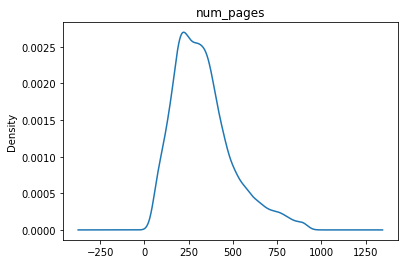

In [48]:
df_filtered_95['num_pages'].plot(kind='density', title="num_pages")

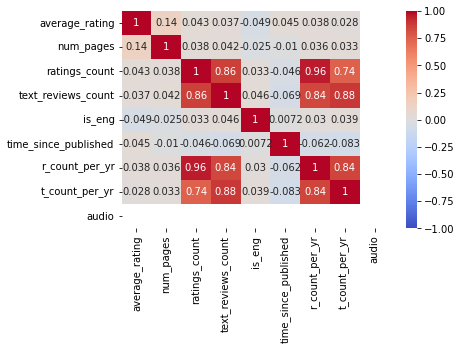

In [49]:
corr = df_filtered_95[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [50]:
df2 = df
df2["num_pages"] = np.log(df["num_pages"])
df2["ratings_count"] = np.log(df["ratings_count"])
df2["text_reviews_count"] = np.log(df["text_reviews_count"])
df2["time_since_published"] = np.log(df["time_since_published"])


ValueError: ignored

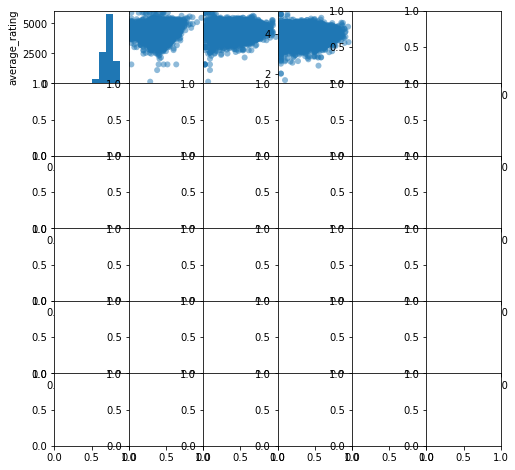

In [51]:
cols = ["average_rating", "num_pages", "ratings_count", "text_reviews_count", "is_eng", "time_since_published"]
pd.plotting.scatter_matrix(df2[cols], figsize=(8,8), marker="o")
plt.show()

In [ ]:
print(df2)

In [ ]:
df3 = pd.DataFrame({"num_pages":df["num_pages"], "ratings_count":df["ratings_count"]})

In [ ]:
print(df3)

        num_pages  ratings_count
bookID                          
1             652        2095690
2             870        2153167
4             352           6333
5             435        2339585
8            2690          41428
...           ...            ...
45631         512            156
45633         635            783
45634         415            820
45639         434            769
45641         272            113

[10740 rows x 2 columns]
